# Finance with Sentdex

### Import all necessary libraries

In [72]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web 

import matplotlib.dates as mdates
import mpl_finance
from mpl_finance import candlestick_ohlc

### Start up dataframe

In [73]:
style.use('ggplot')
## When you need to make your own csv file
# start = dt.datetime(2000,1,1)
# end = dt.datetime(2016,12,31)
# df = web.DataReader('TSLA', 'yahoo', start, end)
# df.to_csv('tsla.csv')

## when you want to load in a csv file and make Date index
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


### Plot dataframe (Adjusted Close)

<IPython.core.display.Javascript object>


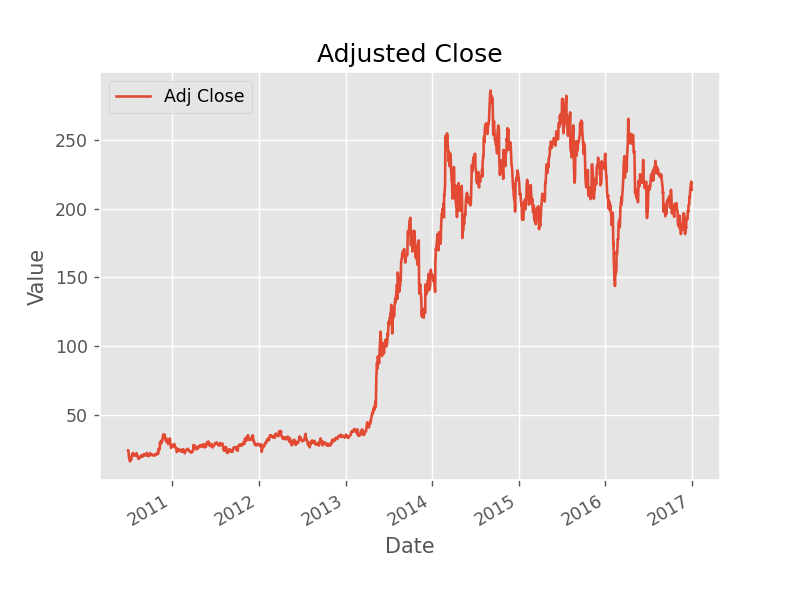

In [95]:
%matplotlib notebook
df['Adj Close'].plot()
plt.title('Adjusted Close')
plt.ylabel('Value')
plt.legend()
plt.show()

### Manipulate Data

In [75]:
# make new column: 100 moving average (minperiods to ajust first 100)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


### Plot 

<IPython.core.display.Javascript object>


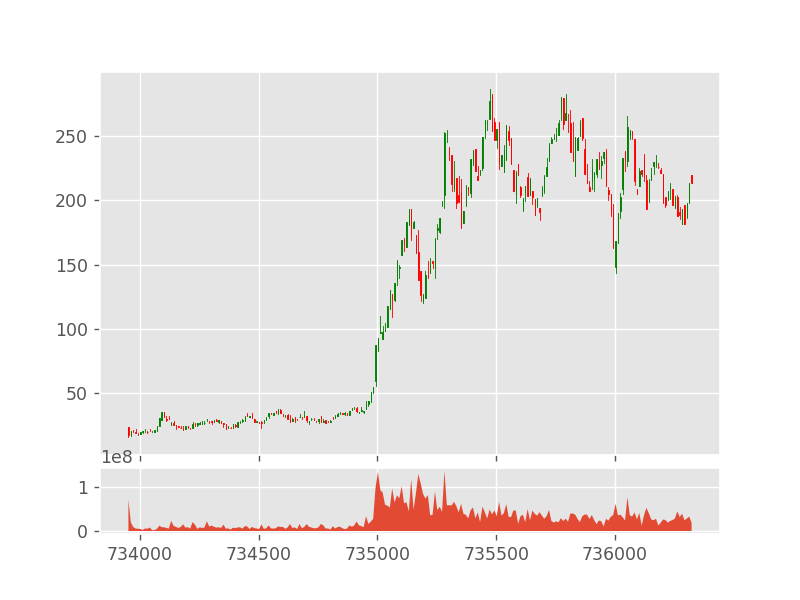

In [76]:
#make notebook interactive
%matplotlib notebook

# dimension, starting point, number of rows, number of columns
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# plot: dates (=index) , adj close
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
register_matplotlib_converters()
ax2.bar(df.index, df['Volume'])


plt.show()

### Candlestick graph

<IPython.core.display.Javascript object>


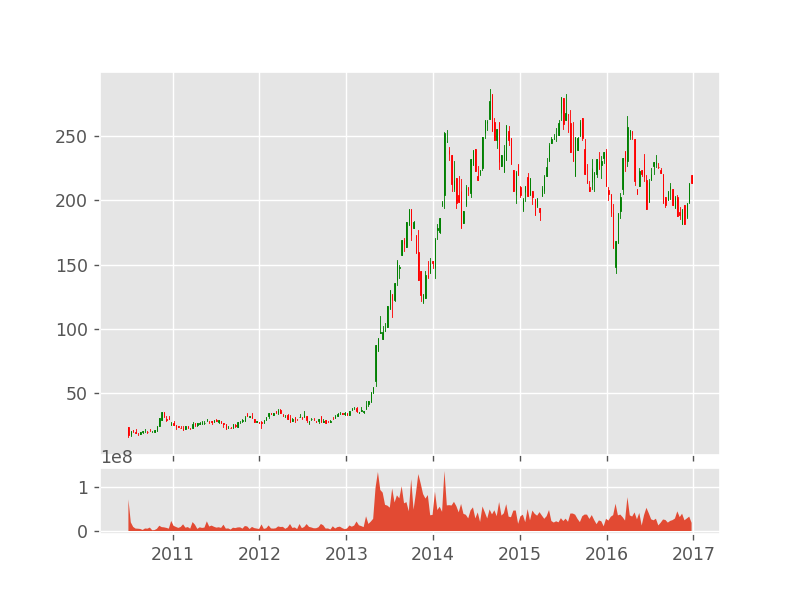

In [94]:
%matplotlib notebook
# resample data to be less data
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

# reset index to make date column
df_ohlc.reset_index(inplace=True)

# convert dates to mdates (necessary for candlestick chart) (map converts it)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

# make sure dates are recognisable dates for humans (instead of weird number)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

# fill between x and y, from 0 to y
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()



## S&P 500

In [118]:
import bs4 as bs
import pickle
import requests
import os
import datetime as dt
import pandas as pd
import pandas_datareader.data as web

### Make list with all tickers from s&p 500

In [128]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table= soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:                            
        ticker = row.findAll('td')[0].text.replace('\n',"") 
        for r in (('\n'),('.','-')):
            ticker = ticker.replace(*r)
        tickers.append(ticker)
        
    # rare shit van pickle library, nog te checken
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)
   
    print(tickers)    
    return tickers

#save_sp500_tickers()

def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2018,4,16)
    end = dt.datetime(2020,4,16)
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have{}'.format(ticker))
            
get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B


KeyError: 'Date'